# Data Collection and Storage Project (Python part)

## Project Description

In addition to the data you retrieved in the previous tasks, you've been given a second file. You now have these two CSVs: 
First with taxi company name and the number of rides for each taxi company on November 15-16, 2017.
Second with Chicago neighborhoods where rides ended and the average number of rides that ended in each neighborhood in November 2017.

For these two datasets you now need to import, study and preprocess the data. Then you need to identify the top 10 neighborhoods in terms of drop-offs; make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs; draw conclusions.

In addition, you need to test the hypothesis:
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

## Table of contents:

1. [Load and study the data](#point1) <br>
2. [Top 10 neighborhoods in terms of drop-offs](#point2) <br>
3. [Taxi companies and the number of rides](#point3) <br>
4. [Testing hypothesis](#point4) <br>

<a id="point1"></a>
### Load and study the data

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data_comp = pd.read_csv('/datasets/project_sql_result_01.csv')
data_comp.sample(10)

,company_name,trips_amount
37,1469 - 64126 Omar Jada,36
40,6574 - Babylon Express Inc.,31
43,2809 - 95474 C & D Cab Co Inc.,29
62,2241 - 44667 - Felman Corp,3
38,6743 - 78771 Luhak Corp,33
3,Yellow Cab,9888
56,5997 - 65283 AW Services Inc.,12
20,Checker Taxi,1486
31,American United Taxi Affiliation,210
15,Checker Taxi Affiliation,2216


In [3]:
data_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
data_comp.trips_amount.describe()

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

In [5]:
len(data_comp.company_name.unique())

64

In [6]:
data_comp.company_name = data_comp.company_name.astype(str)

First, we have 'data_comp' table which contains data on companies and the number of rides for each company on November 15-16, 2017. We see 64 unique company names, with number of rides varying from 2 to 19558. Everything seems OK.

In [7]:
data_loc = pd.read_csv('/datasets/project_sql_result_04.csv')

In [8]:
data_loc.sample(10)

,dropoff_location_name,average_trips
19,Old Town,469.566667
1,River North,9523.666667
17,Edgewater,583.300000
80,West Lawn,7.733333
61,Grand Crossing,22.600000
14,Near South Side,839.833333
48,Austin,44.433333
5,Lake View,2420.966667
24,West Ridge,298.333333
73,Chicago Lawn,12.266667


In [9]:
data_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [10]:
len(data_loc.dropoff_location_name.unique())

94

In [11]:
data_loc.average_trips.describe()

count       94.000000
mean       599.953728
std       1714.591098
min          1.800000
25%         14.266667
50%         52.016667
75%        298.858333
max      10727.466667
Name: average_trips, dtype: float64

In [12]:
data_loc.average_trips = round(data_loc.average_trips, 1).astype(int)

In [13]:
data_loc.head(5)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546


In [14]:
data_loc.tail(5)

,dropoff_location_name,average_trips
89,Mount Greenwood,3
90,Hegewisch,3
91,Burnside,2
92,East Side,2
93,Riverdale,1


Next we have 'data_loc' table with data on Chicago neigborhoods where the ride ended and number of ride dropoffs in every neighborhood in November 2017. We have 94 unique neighborhoods and number of rides, which we rounded and turned into integers so it will be eaiser to make further calculations. 

<a id="point2"></a>
### Top 10 neighborhoods in terms of drop-offs

In [15]:
top10_dropoff = data_loc.sort_values(by='average_trips', ascending=False)[:10]

In [16]:
top10_dropoff

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2421
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


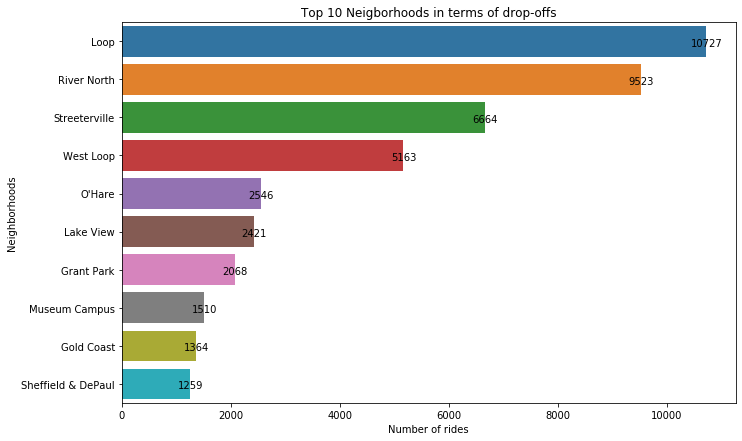

In [17]:
plt.figure(figsize=(11,7))
ax = sns.barplot(x='average_trips', y='dropoff_location_name', data=top10_dropoff)
ax.set(xlabel='Number of rides', ylabel='Neighborhoods', title='Top 10 Neigborhoods in terms of drop-offs')
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')
plt.show()

In top drop-off neighborhoods almost all of them (exept for O'Hare Airport) are in downtown Chicago, which is not that surprising. The most popular is Loop with 10727 drop-offs, then goes River North with 9523 drop-offs. Next we have Streetville with 6664 and West Loop with 5163 drop-offs. Rest of neigborhoods have relatively less drop-offs - from O'Hare with 2546 drop-offs to Sheffield & DePaul with 1259 drop-offs.

That leaves us with basically with top 4 drop-off neighborhoods with relatively big numbers (Loop, River North, Streetville, West Loop) and the rest with smaller numbers of drop-offs.

<a id="point3"></a>
### Taxi companies and the number of rides

In [18]:
data_comp.trips_amount.describe()

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

In [19]:
len(data_comp.query('trips_amount > 1500')) #number 1500 was choosen manually to have top 20 companies, rest goes to 'Other'

20

In [20]:
data_comp['name'] = np.where(data_comp['trips_amount'] > 1500, data_comp['company_name'], 'Other') #selective renaming

In [21]:
data_comp = data_comp[['name', 'trips_amount']]
data_comp.sample(5)

,name,trips_amount
12,Dispatch Taxi Affiliation,3355
53,Other,14
39,Other,33
10,Choice Taxi Association,5015
27,Other,402


In [22]:
companies = data_comp.pivot_table(index='name', values='trips_amount', aggfunc=sum).sort_values(by='trips_amount', ascending=False).reset_index()

In [23]:
companies

,name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Other,10253
4,Yellow Cab,9888
5,Taxi Affiliation Service Yellow,9299
6,Chicago Carriage Cab Corp,9181
7,City Service,8448
8,Sun Taxi,7701
9,Star North Management LLC,7455


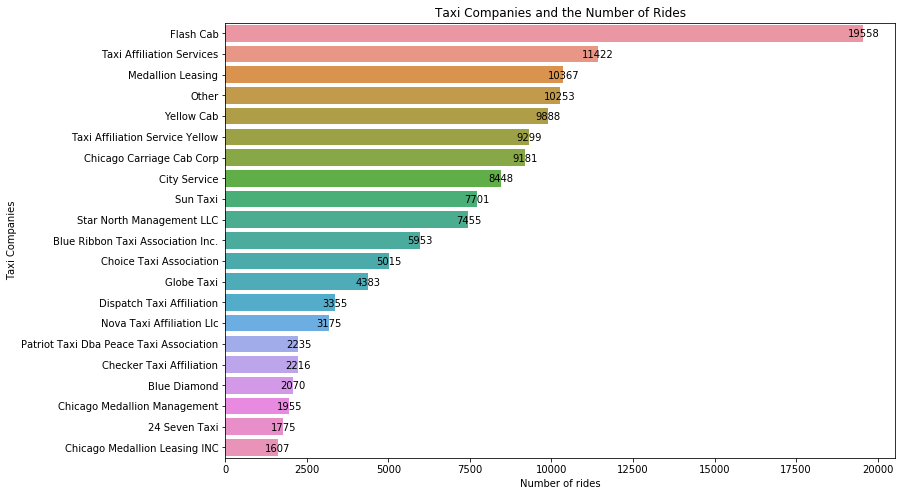

In [24]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='trips_amount', y='name', data=companies)
ax.set(xlabel='Number of rides', ylabel='Taxi Companies', title='Taxi Companies and the Number of Rides')
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center')
plt.show()

We will take a look at 20 biggest taxi companies, the rest goes to 'Other' category.

There is obviously a leading company - Flash Cab with 19558 rides. Second and third place have significantly less rides: Taxi Affiliation Services with 11422 rides and Medallion Leasing with 10367 rides. Next goes 'Other' category - alltogether 44 small companies make 10253 rides. Other 17 big taxi companies have between 1607 to 9888 rides each.

<a id="point5"></a>
### Testing hypothesis

In [25]:
rides = pd.read_csv('/datasets/project_sql_result_07.csv')

In [26]:
rides.sample(10)

,start_ts,weather_conditions,duration_seconds
121,2017-11-04 19:00:00,Good,1869.0
318,2017-11-18 13:00:00,Bad,3317.0
907,2017-11-18 18:00:00,Good,1484.0
419,2017-11-25 11:00:00,Good,1541.0
77,2017-11-11 12:00:00,Good,2213.0
827,2017-11-11 08:00:00,Good,1500.0
65,2017-11-04 18:00:00,Bad,2363.0
418,2017-11-04 07:00:00,Good,1563.0
94,2017-11-11 18:00:00,Good,2220.0
849,2017-11-18 08:00:00,Bad,1313.0


In [27]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [28]:
rides.start_ts = pd.to_datetime(rides.start_ts, format='%Y-%m-%d %H:%M:%S')

In [29]:
rides.duration_seconds = rides.duration_seconds.astype(int)

In [30]:
#Creating data slice for rides with good weather conditions

rides_good = rides.query('weather_conditions == "Good"').copy()
rides_good.duration_seconds.describe()

count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64

In [31]:
#Creating data slice for rides with good weather conditions

rides_bad = rides.query('weather_conditions == "Bad"').copy()
rides_bad.duration_seconds.describe()

count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64

In [32]:
rides_good[rides_good.duration_seconds == 0] #We have 6 rides with duration of 0 seconds, we might just not include them in our slice

,start_ts,weather_conditions,duration_seconds
163,2017-11-11 09:00:00,Good,0
168,2017-11-11 07:00:00,Good,0
204,2017-11-18 19:00:00,Good,0
552,2017-11-04 01:00:00,Good,0
801,2017-11-04 09:00:00,Good,0
1063,2017-11-25 11:00:00,Good,0


In [33]:
rides_good = rides_good[rides_good.duration_seconds != 0]

In [34]:
ride_dur_good = rides_good.duration_seconds
ride_dur_bad = rides_bad.duration_seconds
print('Ride duration for good weather conditions:')
print(ride_dur_good.describe())
print()
print('Average ride duration for good weather conditions:', ride_dur_good.mean())
print('Variance for ride duration for good weather conditions:', np.var(ride_dur_good))
print()
print('Ride duration for bad weather conditions:')
print(ride_dur_bad.describe())
print()
print('Average ride duration for bad weather conditions:', ride_dur_bad.mean())
print('Variance for ride duration for bad weather conditions:', np.var(ride_dur_bad))

Ride duration for good weather conditions:
count     882.000000
mean     2013.278912
std       743.565217
min        60.000000
25%      1397.250000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64

Average ride duration for good weather conditions: 2013.2789115646258
Variance for ride duration for good weather conditions: 552262.3734555047

Ride duration for bad weather conditions:
count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64

Average ride duration for bad weather conditions: 2427.2055555555557
Variance for ride duration for bad weather conditions: 517403.56330246915


#### T-test without removing outliers

In [35]:
alpha = .05

results1 = st.ttest_ind(ride_dur_good, ride_dur_bad, equal_var=False) #run the t-test for two statistical populations whith different variances

print('p-value:', results1.pvalue)
if (results1.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 2.4173590471585584e-11
We reject the null hypothesis


Let's check the hypothesis that average ride duration changes on rainy Saturdays. We only have Saturdays in our data set, so we will divide it into two slices - rides with good weather conditions and rides with bad weather conditions.

The null hypothesis is "The average ride duration is the same in any weather conditions, there is no difference". The alternative hypothesis is "The average ride duration differs on days with different weather conditions". 
We set significance level to standard 0.05.

After running the statistical test we see that the data provided sufficient evidence, given the significance level we selected, to reject the null hypothesis. Therefore, we can conclude that the average ride duration differs on rainy Saturdays. If we look at the data samples we have, we see that on sunny Saturday average ride duration is 2013 seconds (almost 34 minutes), while on rainy Saturdays average ride duration is 2427 seconds (40.5 minutes).

#### T-test with removing outliers with IQR method

In [36]:
# Checking for outliers in good weather conditions:

rdg_desc = ride_dur_good.describe()
print(rdg_desc['25%'] - 1.5 * (rdg_desc['75%'] - rdg_desc['25%'])) #no outliers should be removed
print(rdg_desc['75%'] + 1.5 * (rdg_desc['75%'] - rdg_desc['25%'])) #all values bigger than 4065.375 should be removed

-196.875
4054.125


In [37]:
# Checking for outliers in bad weather conditions

rdb_desc = ride_dur_bad.describe()
print(rdb_desc['25%'] - 1.5 * (rdb_desc['75%'] - rdb_desc['25%'])) #all values less than 513 should be removed
print(rdb_desc['75%'] + 1.5 * (rdb_desc['75%'] - rdb_desc['25%'])) #all values bigger than 4377 should be removed

513.0
4377.0


In [38]:
#Making a slice without outliers

ride_dur_good_checked = rides_good.query('duration_seconds < 4065')['duration_seconds']
ride_dur_bad_checked = rides_bad.query('513 < duration_seconds < 4377')['duration_seconds']

In [39]:
alpha = .05

results1 = st.ttest_ind(ride_dur_good_checked, ride_dur_bad_checked, equal_var=False) #run the t-test for two statistical populations whith different variances

print('p-value:', results1.pvalue)
if (results1.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 3.86739128441034e-14
We reject the null hypothesis
